We have at our disposal the MNIST dataset that represents 70,000 black and white images of 28x28 pixels with a handwritten number ('0' to '9'). The goal is to classify these images among 10 classes.

# Importing the dependencies

We use the libraries numpy for the calculations, matplotlib for the plotting, and sklearn for the IA models.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

We load the dataset MNIST through Keras.

In [19]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

#1. The datasets: MNIST

**1. What are the shape of the data?**

In [3]:
print("X_train shape:" + str(X_train.shape))
print("y_train shape:" + str(y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("y_test shape:" + str(y_test.shape))

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(10000,)


The whole dataset X is of shape (70000, 28, 28), and it is split into two datasets: X_train (60000, 28, 28) and X_test (10000, 28, 28).
The whole dataset y is of shape (70000, 1), and it is split into two datasets: y_train (60000, 1) and y_test (10000, 1).

**Let's display samples from the dataset**

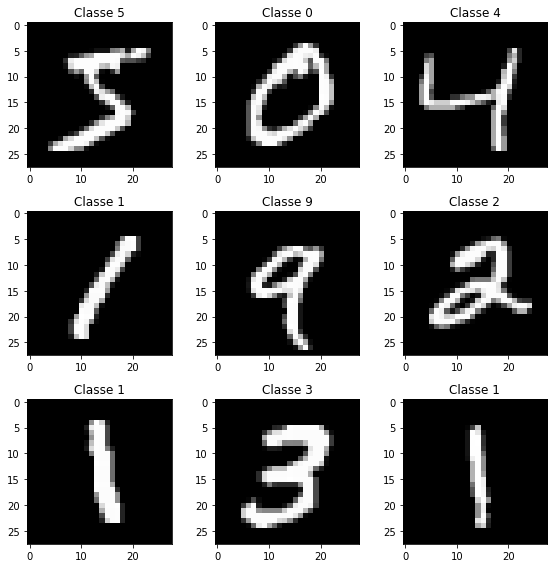

In [ ]:
plt.figure(figsize=(8,8))
for nb_sample in range(9):  
  plt.subplot(330 + 1 + nb_sample)
  img_title = 'Classe ' + str(y[nb_sample])
  plt.title(img_title)
  plt.imshow(X[nb_sample], cmap=plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

**2. Use the sklearn method train_test_split to split the dataset in one train set and one test set. Why this split is important in Machine Learning?**

It is important to split the dataset into two sets: one for training and one for testing in order to verify the model developement. Indeed, when a model is trained on learning data, it recognizes trends and relationships in that data. Using the same data to evaluate the model's performance may overestimate its ability to generalize to new data: it may overfit. Using a separate test dataset provides a more accurate estimate of the model's performance on new data.

We can manually split the data with sklearn method **train_test_split**, but they already were split when imported.

We can choose the test size (0.25 means 1/4 of the dataset is used for the test), and the random state which sets a random seed for splitting the data into training and test sets. This ensures that results are reproducible with the same parameter.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**3. Are the train and test sets well balanced (distribution of labels)? Why is it important for supervised Machine Learning?**

We look at the distribution of data in both datasets, that is, the proportion of each class in the datasets. If the distribution is the same, then the datasets are well balanced. A well-balanced dataset is important for machine learning because an imbalanced dataset can lead to biased or less accurate models. A well-balanced dataset ensures that the model is able to generalize to different classes and make accurate predictions for all of them.

In [21]:
n_samples_X_train = X_train.shape[0]
n_samples_y_train = y_train.shape[0]
n_samples_X_test = X_test.shape[0]
n_samples_y_test = y_test.shape[0]

In [22]:
nb_samples_in_X_train = np.zeros(10)
nb_samples_in_X_test = np.zeros(10)

In [ ]:
for i in range(10):
    nb_samples_in_X_train[i] = np.count_nonzero(y_train == y[i])
print("Train :",np.around(nb_samples_in_X_train/X_train.shape[0]*100, decimals=2))

for i in range(10):
    nb_samples_in_X_test[i] = np.count_nonzero(y_test == y[i])
print("Test  :",np.around(nb_samples_in_X_test/X_test.shape[0]*100, decimals=2))

Train : [ 8.96  9.88  9.98 11.24  9.92  9.96 11.24 10.16 11.24  9.98]
Test  : [ 9.18  9.79  9.07 11.3  10.01 10.06 11.3  10.32 11.3   9.07]


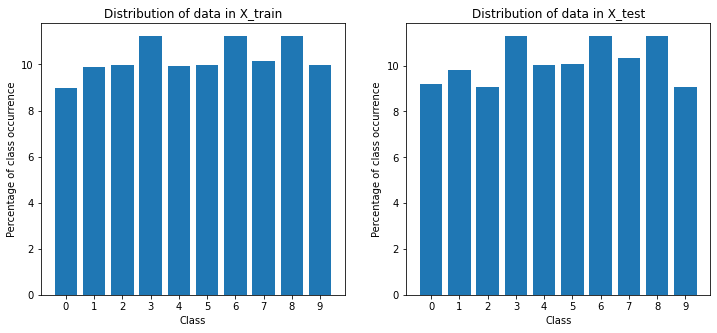

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.bar(range(len(nb_samples_in_X_train)), nb_samples_in_X_train/X_train.shape[0]*100)
plt.xlabel('Class')
plt.ylabel("Percentage of class occurrence")
plt.xticks(range(len(nb_samples_in_X_train)))
plt.title('Distribution of data in X_train')

plt.subplot(1, 2, 2)
plt.bar(range(len(nb_samples_in_X_test)), nb_samples_in_X_test/X_test.shape[0]*100)
plt.xlabel('Class')
plt.ylabel("Percentage of class occurrence")
plt.xticks(range(len(nb_samples_in_X_test)))
plt.title('Distribution of data in X_test')
plt.show()

We observe that the percentages of the 10 digits are almost the same in the train set and in the data set.   

#2. Unsupervised Machine Learning

##2.1. Dimensionality reduction

**1. Perform a Principal Component Analysis (PCA) with sklearn.Try to keep different n_components**

The goal is to reduce the dimensionality of the dataset while preserving as much information as possible. The PCA does this by identifying the directions of maximum variance in the data and creating new, uncorrelated variables, called principal components, that capture this variance.

We start by flattening the images by reshaping (n_samples, 28,28) into (n_samples, 784).

In [23]:
# flattening the images
flatten_X_train = X_train.reshape((n_samples_X_train, -1))
flatten_y_train = y_train.reshape((n_samples_y_train, -1))
flatten_X_test = X_test.reshape((n_samples_X_test, -1))
flatten_y_test = y_train.reshape((n_samples_y_test, -1))

Then, we vary the number of principal components that we want to use to best represent the data in a lower-dimensional space. The number of components corresponds to the dimension of the projected space.

We reverse the PCA transformation (that is, we reproject into the $\mathbb{R}
^{784}$ space) and reshape the images to observe the impact of PCA on the loss of information on the images.

**2. Display some MNIST pictures with different values of n_components.**

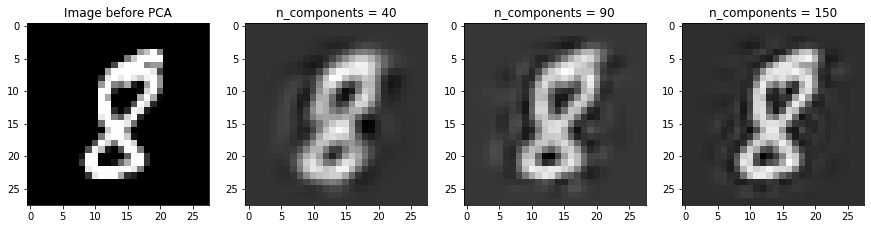

In [ ]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(15, 15)
ax[0].set_title('Image before PCA')
ax[0].imshow(X_train[150], cmap=plt.get_cmap('gray'))
n_components_arr = np.array([40, 90, 150])
for i in range(3):
    n_components = n_components_arr[i]
    pca = PCA(n_components = n_components)
    pca.fit(flatten_X_train)
    X_reduced = pca.transform(flatten_X_train)
    X_reduced_img = pca.inverse_transform(X_reduced)
    X_reduced_img_reshaped = X_reduced_img.reshape((n_samples_X_train, 28, 28))
    img_title = 'n_components = ' + str(n_components)
    ax[i+1].set_title(img_title)
    ax[i+1].imshow(X_reduced_img_reshaped[150], cmap=plt.get_cmap('gray'))
plt.show()

**3. An interesting feature is PCA.explained_variance_ratio_
Explain these values according to your understanding of PCA and use these
values to fit a relevant value for n_components**

The **explained_variance_ratio_** corresponds to the proportion of the total variance in the data that is explained by each of the **n_components** selected principal components. This means that the values in the **explained_variance_ratio_** array add up to 1. The first value in the array represents the proportion of the total variance explained by the first principal component, the second value represents the proportion explained by the second principal component, and so on. The cumulative explained variance ratio enables us to see how much information or variance is retained in the data after projecting it onto a lower-dimensional subspace.

Thus, we can determine the number of principal components that retain a certain percentage of the information in the data.

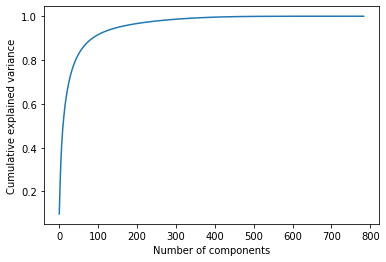

In [ ]:
pca = PCA().fit(flatten_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

For instance, we can determine the dimension of the subspace that "keeps at least 90% of the information".

In [ ]:
for n_components in range(0, 28*28, 5):
     pca = PCA(n_components = n_components)
     pca.fit(flatten_X_train)
     if np.sum(pca.explained_variance_ratio_) > 0.9:
         print(n_components)
         break

90


In [ ]:
print(np.sum(pca.explained_variance_ratio_)*100, "%")

90.39816527400713 %


We also found it interesting to display the first several principal components, which can be called "eigendigits".

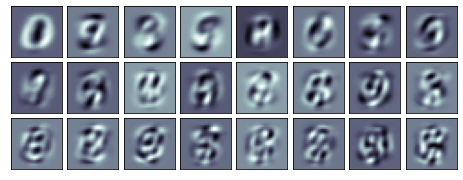

In [ ]:
pca = PCA(90)
pca.fit(flatten_X_train)
fig, axes = plt.subplots(3, 8, figsize=(8, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='bone')

Finally, we can display the data according to the first two principal components, i.e. in two dimensions, to visualise groupings of the data according to their label.

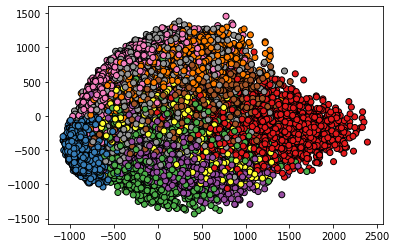

In [28]:
pca = PCA(n_components = 2)
pca.fit(flatten_X_train)
X_reduced_train_2 = pca.transform(flatten_X_train)
X_reduced_test_2 = pca.transform(flatten_X_test)
fig = plt.figure()
plt.scatter(X_reduced_train_2[:, 0], X_reduced_train_2[:, 1], c=flatten_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.show()

##2.2. Data clustering

The objective is to classify the images into 10 classes in an unsupervised manner. For this, two known methods are the K-Means algorithm and the Expectation-Maximization (EM) for the Gaussian Mixture Model.

###2.2.1. K-Means algorithm

To visualize the data in two dimensions, a PCA with **n_components = 2** is performed. The order in which things are done (the PCA can be done before or after the K-Means on the centroids) affects the performance of the classification.

We begin by applying K-Means clustering with **K = 10** clusters and randomly initializing the centroids.

In [ ]:
#kmeans = KMeans(n_clusters=10, random_state=0)
kmeans = KMeans(n_clusters=10, init="k-means++")
kmeans_fit = kmeans.fit(flatten_X_train)
labels = kmeans.labels_
labels_PCA_after = labels
print("Labels shape: ", labels.shape)
kmeans_predict = kmeans.predict(flatten_X_test)
centroids = kmeans.cluster_centers_
print("Centroids shape: ", centroids.shape)
reduced_centroids = pca.transform(centroids)

In [56]:
#kmeans = KMeans(n_clusters=10, random_state=0)
kmeans = KMeans(n_clusters=10, init="k-means++")
kmeans_fit = kmeans.fit(X_reduced_train_2)
labels = kmeans.labels_
labels_PCA_before = labels
print("Labels shape: ", labels.shape)
kmeans_predict = kmeans.predict(X_reduced_test_2)
centroids_2 = kmeans.cluster_centers_
print("Centroids shape: ", centroids_2.shape)

Labels shape:  (52500,)
Centroids shape:  (10, 2)


There are several indicators to evaluate the performance of clustering, knowing the ground truth labels.

####1. Rand Index and Adjusted Rand Index

A first indicator is the Rand Index which measures the similarity between two datasets. It actually represents the proportion of pairs of items that were either correctly classified together or correctly separated.

In [ ]:
print("Rand index: ", metrics.rand_score(labels, y_train))

Rand index:  0.8575492975376402


Therefore, according to the rand index, 81% of the data has well been clustered. However, the rand index does not take into account the probability that the results obtained are due to chance. So, we use the Adjusted Rand index, which is calculated by comparing the results obtained with those that would have been obtained using a random classification.

In [ ]:
print("Adjusted Rand index: ", metrics.adjusted_rand_score(labels, y_train))

Adjusted Rand index:  0.236870289287717


An adjusted rand index value of 0 indicates a random classification and a value close to 1 indicates a very good classification. It can be seen that the clustering is ultimately not very effective.

####2. Mutual Information based scores

Other ways to evaluate how good is the partition are based on Mutual Information: Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is a ratio of the mutual information between the true and estimated labels to the average entropy of the labels. It ranges between -1 and 1, with 1 representing a perfect match. AMI is similar to NMI but also considers chance agreement, and it also ranges between -1 and 1 with 1 being the best possible match.

In [ ]:
print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(labels, y_train))
print("Normalized Mutual Information: ", metrics.normalized_mutual_info_score(labels, y_train))

Adjusted Mutual Information:  0.35641697599105227
Normalized Mutual Information:  0.35663477632432533


####3. Homogeneity, Completeness and V-measure

Homogeneity, completeness, and V-measure are evaluation metrics used to give a more comprehensive measure of the clustering performance.

* **Homogeneity** measures whether all the data points within a single cluster belong to the same class. A score of 1 represents perfect homogeneity, meaning that all data points within a single cluster belong to the same class.
* **Completeness** measures whether all the data points of a given class are assigned to the same cluster. A score of 1 represents perfect completeness, meaning that all data points of a given class are assigned to the same cluster.
* **V-measure** is the harmonic mean of homogeneity and completeness. It ranges between 0 and 1, with 1 representing a perfect match between the true labels and the estimated labels.

In [ ]:
print("Homogenity score: ", metrics.homogeneity_score(labels, y_train)) # The most indicative score
print("Completeness score: ", metrics.completeness_score(labels, y_train))
print("V-measure score: ", metrics.v_measure_score(labels, y_train))

Homogenity score:  0.35989964172258404
Completeness score:  0.3534286135022256
V-measure score:  0.35663477632432533


We can conclude that the performance of the classification is average, as most of the scores are in the middle range when the PCA is performed after the K-Means. It is not as good when the PCA is performed before the K-Means, but the K-Means computes faster.

---
#### Displaying the partition

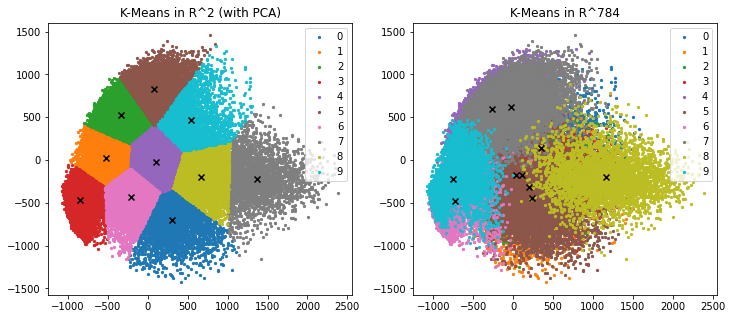

In [ ]:
u_labels = np.unique(labels)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in u_labels:
    plt.scatter(X_reduced_train_2[labels_PCA_before == i , 0] , X_reduced_train_2[labels_PCA_before == i , 1], s = 5, label = i)
plt.scatter(centroids_2[:,0], centroids_2[:,1] , marker = 'x', color = 'k')
plt.title("K-Means in R^2 (with PCA)")
plt.legend()

plt.subplot(1, 2, 2)
for i in u_labels:
    plt.scatter(X_reduced_train_2[labels_PCA_after == i , 0] , X_reduced_train_2[labels_PCA_after == i , 1], s = 5, label = i)
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1] , marker = 'x', color = 'k')
plt.title("K-Means in R^784")
plt.legend()

plt.show()

Although the 2D partition displayed of the K-Means performed after dimension reduction (by PCA) appears cleaner than that of the K-Means performed in R^784 space, it is not more performant. In fact, on the contrary, the right partition shows the complexity of the data and the limitation of projecting them in 2D.

We notice that the different types of initialization have no significant influence on the clustering. Also, most of the performance scores (except Rand Index) seem to be higher when K = 10.

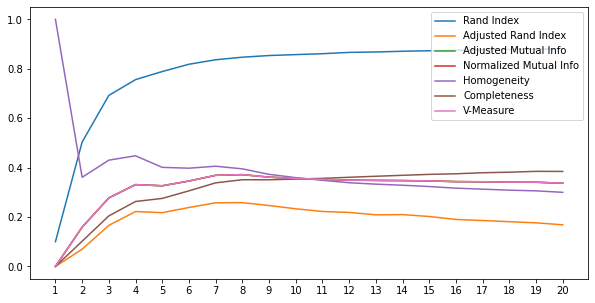

In [ ]:
plt.figure(figsize=(10, 5))
K_arr = np.arange(1, 21)
RI_arr = np.zeros(20)
ARI_arr = np.zeros(20)
AMI_arr = np.zeros(20)
NMI_arr = np.zeros(20)
homogeneity_arr = np.zeros(20)
completeness_arr = np.zeros(20)
v_measure_arr = np.zeros(20)
for K in K_arr:
  kmeans = KMeans(n_clusters=K, init="k-means++")
  kmeans.fit(X_reduced_train_2)
  kmeans.predict(X_reduced_test_2)
  ARI_arr[K-1] = metrics.adjusted_rand_score(kmeans.labels_, y_train)
  RI_arr[K-1] = metrics.rand_score(kmeans.labels_, y_train)
  AMI_arr[K-1] = metrics.adjusted_mutual_info_score(kmeans.labels_, y_train)
  NMI_arr[K-1] = metrics.normalized_mutual_info_score(kmeans.labels_, y_train)
  homogeneity_arr[K-1] = metrics.homogeneity_score(kmeans.labels_, y_train)
  completeness_arr[K-1] = metrics.completeness_score(kmeans.labels_, y_train)
  v_measure_arr[K-1] = metrics.v_measure_score(kmeans.labels_, y_train)
plt.plot(K_arr, RI_arr, label="Rand Index")
plt.plot(K_arr, ARI_arr, label="Adjusted Rand Index")
plt.plot(K_arr, AMI_arr, label="Adjusted Mutual Info")
plt.plot(K_arr, NMI_arr, label="Normalized Mutual Info")
plt.plot(K_arr, homogeneity_arr, label="Homogeneity")
plt.plot(K_arr, completeness_arr, label="Completeness")
plt.plot(K_arr, v_measure_arr, label="V-Measure")
plt.legend()
plt.xticks(range(1, 21, 1))
plt.show()

###2.2.2. EM-clustering

The Expectation-Maximization is a way to fit a Gaussian Mixture Model that assumes a dataset consists of multiple Gaussian distributions. The EM algorithm iteratively improves (refines) estimates of the Gaussian distributions' parameters (means, variances, and mixture proportions) to maximize the likelihood of the observed data.

Let's start by applying the algorithm to the data without applying PCA beforehand.

In [24]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
gmm.fit(flatten_X_train)
cluster_assignments = gmm.predict(flatten_X_test)

Let's display a random image and see the label that was assigned to it.

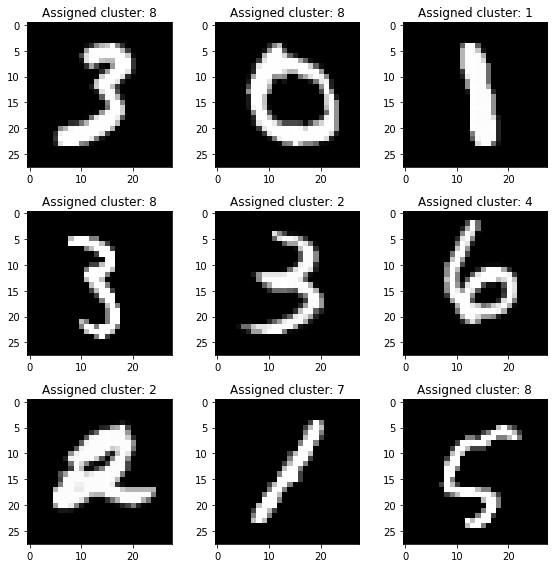

In [55]:
# Plot the original image and the assigned cluster for a random image
rand_indexes = [np.random.randint(0, 17500) for i in range(9)]

plt.figure(figsize=(8,8))
for i in range(9):
  rand_index = rand_indexes[i]  
  plt.subplot(330 + 1 + i)
  plt.title("Assigned cluster: {}".format(cluster_assignments[rand_index]))
  plt.imshow(X_train[rand_index], cmap=plt.get_cmap('gray'), interpolation='nearest')
plt.tight_layout()
plt.show()

We can display the projected partition in 2 dimensions.

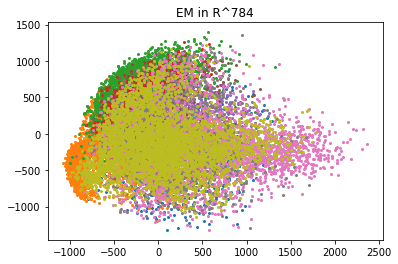

In [61]:
u_labels = np.unique(cluster_assignments)
for i in u_labels:
  plt.scatter(X_reduced_test_2[cluster_assignments == i , 0] , X_reduced_test_2[cluster_assignments == i , 1], s = 4, label = i)
plt.title("EM in R^784")
plt.show()

We can apply a PCA and apply the algorithm on the data in 2 dimensions.

In [57]:
gmm_pca = GaussianMixture(n_components=10)
gmm_pca.fit(X_reduced_train_2)
cluster_assignments_pca = gmm_pca.predict(X_reduced_test_2)

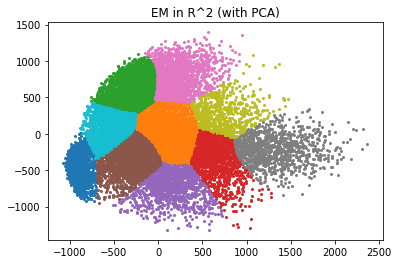

In [60]:
u_labels = np.unique(cluster_assignments_pca)
for i in u_labels:
  plt.scatter(X_reduced_test_2[cluster_assignments_pca == i , 0] , X_reduced_test_2[cluster_assignments_pca == i , 1], s = 4, label = i)
plt.title("EM in R^2 (with PCA)")
plt.show()

Again, the partition is much clearer when dimensionality reduction (PCA) is applied before the algorithm, which is logical.

We can use the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) to evaluate and compare the relative quality of different statistical models.

In brief, the optimal number of clusters is the value that minimizes the AIC or BIC (depending on which approximation we wish to use).

In [70]:
pca = PCA(n_components = 90)
pca.fit(flatten_X_train)
X_reduced_train_90 = pca.transform(flatten_X_train)
X_reduced_test_90 = pca.transform(flatten_X_test)

In [71]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_reduced_train_90)
          for n in n_components]

/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


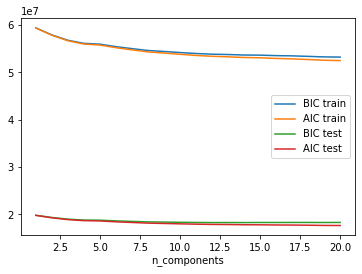

In [72]:
plt.plot(n_components, [m.bic(X_reduced_train_90) for m in models], label='BIC train')
plt.plot(n_components, [m.aic(X_reduced_train_90) for m in models], label='AIC train')
plt.plot(n_components, [m.bic(X_reduced_test_90) for m in models], label='BIC test')
plt.plot(n_components, [m.aic(X_reduced_test_90) for m in models], label='AIC test')
plt.legend(loc='best')
plt.xlabel('n_components');

The result is unsatisfactory as we should get a minimum AIC and BIC for n_components = 10.

#3. Supervised Machine Learning

##3.1 Decision Tree, SVM and Logistic Regression

**What is the major difference between Naïve Bayes Classifier and Support Vector Machine (or Logistic Regression)?**

The major difference between Naive Bayes and Support Vector Machine (SVM) or Logistic Regression is the way they model the decision boundary. Naive Bayes makes a strong assumption that the features are independent of each other and uses Bayes theorem to model the decision boundary: $P(X|y)$ is used to determine $P(y|X)$. SVM and Logistic Regression, on the other hand, do not make any assumptions about the independence of features and use optimization techniques to find the best decision boundary. They are trying to predict $P(y|X)$.

###3.1.1. Support Vector Machine (SVM)

---
**With sklearn, perform a SVM classification. With the documentation, check how to modify the parameters and comment how it influences the results.**

We start by performing a SVM classification with a linear kernel and a regularization parameter $C$ equal to 1. $C$ is also called **penalty factor**: it controls the trade-off between the complexity of the model and the tolerance to classification errors, where a greater $C$ means a more complex model with less tolerance to errors (hard-margin SVM), and a smaller $C$ means a simpler model with more tolerance to errors (soft-margin SVM).

The accuracy of the model will be printed out after the classifier is trained and tested on the test data.

Takes a lot of time ! 

In [ ]:
# Creation of a SVM classifier with a linear kernel and C equal to 1  
clf = svm.SVC(kernel='linear', C=0.001,random_state=42)

In [ ]:
clf.fit(flatten_X_train, flatten_y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.001, kernel='linear', random_state=42)

In [ ]:
predict_train = clf.predict(flatten_X_train)

In [ ]:
predict_test = clf.predict(flatten_X_test)

In [ ]:
# Testing the classifier on the test dataset
accuracy = clf.score(flatten_X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9196571428571428


With a very soft-margin linear SVM ($C=0.01$) and without dimensionality reduction and normalization, the accuracy is equal to 0.920.

In [ ]:
clf_rbf = make_pipeline(StandardScaler(), svm.SVC(C = 1, kernel = 'rbf',    gamma = 'auto')).fit(flatten_X_train, y_train)

In [ ]:
predict_train_rbf = clf_rbf.predict(flatten_X_train)
predict_test_rbf = clf_rbf.predict(flatten_X_test)
accuracy_rbf = clf_rbf.score(flatten_X_test, y_test)
print("Accuracy: ", accuracy_rbf)

Accuracy:  0.9625142857142858


With a hard-margin ($C=1$) SVM with a RBF kernel and pipelining (including normalization), the accuracy is equal to 0.963.

We can plot the accuracy of the model on the train and test data by varying the penalty factor. For speed of execution issues, **we apply a PCA with 2 principal components.**

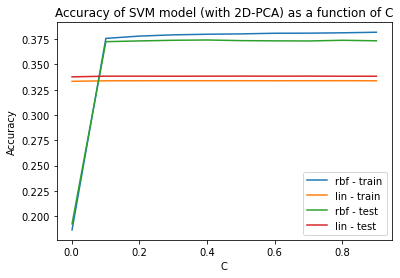

In [ ]:
C = np.arange(0.001, 1.001, 0.1) # Différentes valeurs du paramètre C # 0.01 step
accuracy_test_rbf = []                            # Mesure de précision pour le mode rbf
accuracy_test_lin = []                            # Mesure de précision pour le mode linear
accuracy_train_rbf = []                            # Mesure de précision pour le mode rbf
accuracy_train_lin = []                            # Mesure de précision pour le mode linear

for c in C:
  clf_rbf = make_pipeline(StandardScaler(), PCA(n_components=2), svm.SVC(C = c, kernel = 'rbf',    gamma = 'auto')).fit(flatten_X_train, y_train)
  clf_lin = make_pipeline(StandardScaler(), PCA(n_components=2), svm.SVC(C = c, kernel = 'linear', gamma = 'auto')).fit(flatten_X_train, y_train)

  y_test_predicted_rbf = clf_rbf.predict(flatten_X_test)
  y_test_predicted_lin = clf_lin.predict(flatten_X_test)
  accuracy_test_rbf.append(clf_rbf.score(flatten_X_test, y_test))
  accuracy_test_lin.append(clf_lin.score(flatten_X_test, y_test))
  y_train_predicted_rbf = clf_rbf.predict(flatten_X_train)
  y_train_predicted_lin = clf_lin.predict(flatten_X_train)
  accuracy_train_rbf.append(clf_rbf.score(flatten_X_train, y_train))
  accuracy_train_lin.append(clf_lin.score(flatten_X_train, y_train))

plt.plot(C, accuracy_train_rbf, label = "rbf - train")
plt.plot(C, accuracy_train_lin, label = "lin - train")
plt.plot(C, accuracy_test_rbf, label = "rbf - test")
plt.plot(C, accuracy_test_lin, label = "lin - test")


plt.legend()
plt.title("Accuracy of SVM model (with 2D-PCA) as a function of C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.show()

The effect of PCA in two dimensions looks drastic on the model accuracy which does not exceed 0.4. However, it is noted that the RBF model is poor in the case of a hard-margin kernel. The RBF model is slightly better than the linear model in terms of accuracy. The value of C does not impact the model accuracy (except for the RBF model for C < 0.1), probably because PCA removed too much information.

---
###3.1.2. Decision Tree

The principle of a decision tree is to split data into branches based on the values of input features, and to make predictions based on the majority class or average value of the samples in the leaves. The splits are determined by selecting the feature that maximizes information gain.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [94]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(flatten_X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(flatten_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8755


In [85]:
from sklearn.tree import plot_tree

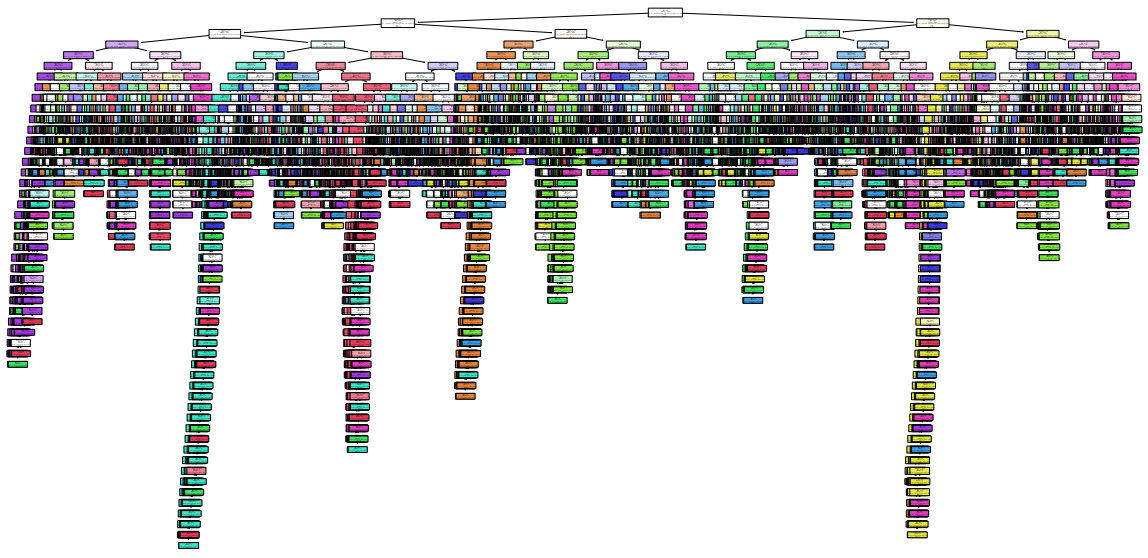

In [95]:
# Create a list of feature names
feature_names = ["pixel" + str(i) for i in range(flatten_X_train.shape[1])]

# Convert the integers in the np.arange(10) array to strings
class_names = [str(i) for i in np.arange(10)]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True);
plt.show()

The Depth of the tree i.e. the maximum number of branch levels is here equal to 50. It has an accuracy of 87,55%. 

In [96]:
depth = clf.tree_.max_depth
print(depth)

50


Let's see the confusion matrix to evaluate the performance comparing the predicted class labels to the true class labels. It summarizes the number of correct and incorrect predictions, providing insights into the types of errors made by the classifier.

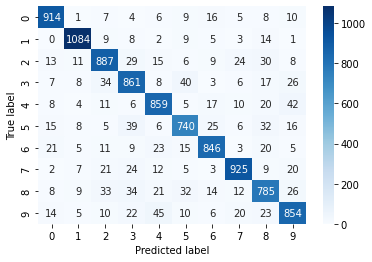

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(flatten_X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The accuracy of our decision tree varies according to its depth.

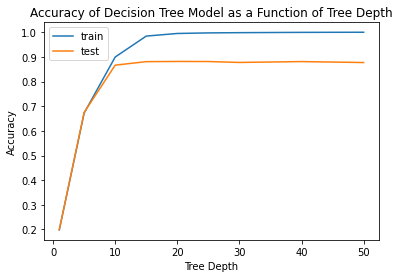

In [98]:
  depths = [1, 5, 10, 15, 20, 25, 30, 40, 50]
  accuracies = [] #store
  accuracy_train_tree = []                            
  accuracy_test_tree = []                            

  for depth in depths:
    clf_tree = DecisionTreeClassifier(max_depth=depth)
    clf_tree.fit(flatten_X_train, y_train)
    y_test_predicted_tree = clf_tree.predict(flatten_X_test)
    accuracy_test_tree.append(clf_tree.score(flatten_X_test, y_test))
    y_train_predicted_tree = clf_tree.predict(flatten_X_train)
    accuracy_train_tree.append(clf_tree.score(flatten_X_train, y_train))
    accuracy = accuracy_score(y_test, y_test_predicted_tree)
    accuracies.append(accuracy)
    #print("Accuracy for depth = {}: {:.4f}".format(depth, accuracy))
  

plt.plot(depths, accuracy_train_tree, label = "train")
plt.plot(depths, accuracy_test_tree, label = "test")

plt.legend()
plt.title("Accuracy of Decision Tree Model as a Function of Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.show()


Of course, here we can see that the accuracy of the model on the test dataset is lower than the accuracy on the training set, therefore the model overfits.

We can plot the scores against the training size to visualize how the model performs with different amounts of training data. This allows us to see if the model is overfitting or underfitting and helps us determine the optimal amount of training data required.

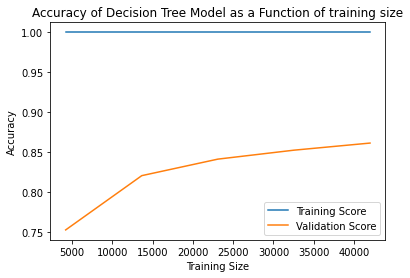

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(clf, flatten_X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.legend(loc='best')
plt.title("Accuracy of Decision Tree Model as a Function of training size")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.show()

This plot confirms that the tree obviously overfits: the accuracy on the training set is 100% regardless of the training size, and the validation accuracy is much lower. To address overfitting in a decision tree, we can use techniques such as **pruning**, **early stopping**, and ensemble methods such as **random forests.**

---
###3.1.3. Logistic Regression

We create a Logistic Regression model with the following parameters:
* fit_intercept = True: a bias is added to the logistic regression
* multi_class = 'auto': resolves a multi-class classification problem. The strategy used is One vs All.
* penalty = 'l2': ridge regularization is used
* solver = 'saga': the SAGA algorithm is used to solve the system of equations
* max_iter = 10000: the maximum number of iterations to perform
* C = 50: the inverse value of regularization. The higher the value of C, the lower the regularization (which can lead to overfitting).

In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [ ]:
clf.fit(flatten_X_train, flatten_y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---
###3.1.4. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
# fit the classifier to the training data
gnb.fit(flatten_X_train, y_train)
# make predictions on the test data
y_pred = gnb.predict(flatten_X_test)
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.5558


Naive Bayes Classifier does not appear to perform well for MNIST dataset as it produced an overall accuracy of ~56%.


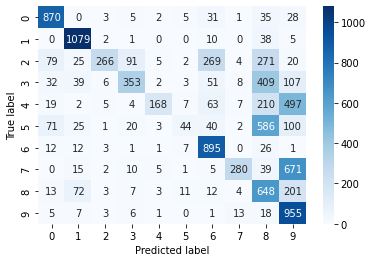

In [ ]:
# Compute the confusion matrix
cnf_matrix_gnb = confusion_matrix(y_test, y_pred)

sns.heatmap(cnf_matrix_gnb, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Looking at confusion matrix above, we can observe that (5,8), (5,9), (4,8), (4,9), (7,9) are some of the combinations where the classifier is confused in predicting the right label.

---

##3.2. Deep Learning

The goal is still to perform a supervised image classification task, but with Deep Learning.

###3.2.1. MultiLayer Perceptron (MLP)

Our first MLP is made of:
* one input layer that flattens the images,
* one hidden layer with ReLu activation function,
* one output layer (10 labels) with softmax function to get a probability.

We chose the Adam optimizer (often used for deep neural networks though). We also chose the Sparse Categorical Cross-entropy loss function and the sparse categorical accuracy because they are appropriate for multi-class classification.
It is mandatory to normalize the data into [0, 1].

**What is the size of the input tensor? What is the size of the output layer?**

The size of the input tensor is $28\times 28 = 784$.

The size of the output layer is $10$.

**How many epochs do you use? What does it mean? What is the batch_size? What does it means?**

We chose at first 10 epochs: the same data goes 10 times into the MLP.

By default, the **batch_size** is 32 on TensorFlow. Here, we have also set it to 32. The batch size is the number of training samples used to update the model weights at each training iteration. A larger batch size may result in faster convergence, but may also require more memory and may make convergence less stable. A smaller batch size may result in slower convergence, but may also improve stability.

**Why do we define a validation set (for example: validation_split=0.2)?**

A validation set is defined to assess the performance of a model on unseen data during training. The purpose of the validation set is to prevent overfitting. By evaluating the model on the validation set, we can tune the hyperparameters of the model and avoid overfitting to the training data. The test set must be different from the validation set and the training dataset in order to provide an objective estimate of the performance of the model on data not previously seen.

**Pick the most important parameters you have to set with the compile and the fit method. Briefly explain why they are important parameters, i.e. they influence the training process.**

The choice of parameters in the compile and fit methods is important for training the neural network model as it can have a considerable impact on the performance of the model. Indeed:
* The optimiser determines the method used to adjust the model weights for loss.
* The loss function measures the error of the model during training and is used to adjust the weights.
* The metric is used to evaluate the performance of the model.
* The number of epochs is important because if you train the model for too few epochs, it may not be trained sufficiently, but if you train the model for too long, you risk overfitting.
* The batch size and the training and validation sets are important *(already explained)*.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattening the input
  tf.keras.layers.Dense(128, activation='relu'), # One hidden layer with ReLu function
  tf.keras.layers.Dense(10, activation='softmax') # Output layer with Softmax function                         # Can add ", activation ='softmax'
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # Optimizer choice
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function: Cross-entropy                       # If softmax added above, remove from_logits=True
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics: Sparse Categorical Accuracy
)

history = model.fit(
    X_train/255, y_train, # Normalize the data into [0, 1] !
    batch_size=32,
    epochs=15,
    verbose=2,
    validation_split=0.2
)

model.summary()

Epoch 1/15
1313/1313 - 8s - loss: 0.3039 - sparse_categorical_accuracy: 0.9116 - val_loss: 0.1799 - val_sparse_categorical_accuracy: 0.9467 - 8s/epoch - 6ms/step
Epoch 2/15
1313/1313 - 4s - loss: 0.1351 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.1338 - val_sparse_categorical_accuracy: 0.9591 - 4s/epoch - 3ms/step
Epoch 3/15
1313/1313 - 6s - loss: 0.0936 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1097 - val_sparse_categorical_accuracy: 0.9674 - 6s/epoch - 4ms/step
Epoch 4/15
1313/1313 - 5s - loss: 0.0692 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.1101 - val_sparse_categorical_accuracy: 0.9678 - 5s/epoch - 4ms/step
Epoch 5/15
1313/1313 - 4s - loss: 0.0522 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0971 - val_sparse_categorical_accuracy: 0.9699 - 4s/epoch - 3ms/step
Epoch 6/15
1313/1313 - 4s - loss: 0.0410 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9699 - 4s/epoch - 3ms/step
Epoch 7/15
1313/1313 - 3s - 

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=2)
_, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

1641/1641 - 4s - loss: 7.6526 - sparse_categorical_accuracy: 0.9888 - 4s/epoch - 3ms/step
547/547 - 1s - loss: 29.1614 - sparse_categorical_accuracy: 0.9699 - 796ms/epoch - 1ms/step

Train accuracy: 0.9888380765914917
Test accuracy: 0.9698857069015503


The test accuracy is not as high as the train accuracy. Therefore, the model overfits. Furthermore, during the training phase, there is a difference between the accuracy of the model on the training set and the accuracy on the validation set. Generally, over the epochs, the model overfits when the accuracy on the training set increases without the accuracy on the validation set increasing. We can better visualize this phenomenon by plotting the accuracy and the loss against the epoch.

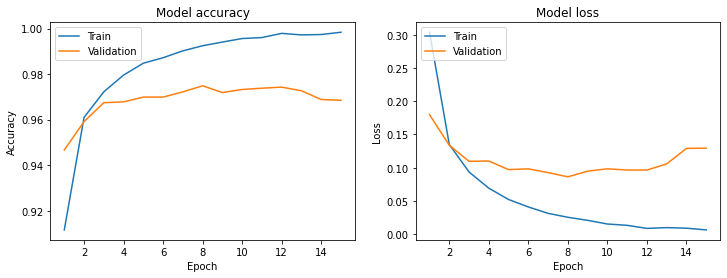

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(history.history['sparse_categorical_accuracy']) + 1), history.history['sparse_categorical_accuracy'])
plt.plot(np.arange(1, len(history.history['val_sparse_categorical_accuracy']) + 1), history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can observe that the model performs best in terms of generalization when the number of epochs is equal to 2. This is evident because at this point, the accuracy on the training dataset is closest to the accuracy on the validation dataset.

If we add more layers, there will be more capacity (to learn complex representations of the data) so the biais will decrease and the variance will increase.
 
However, to prevent overfitting, we can add regularization techniques such as dropout, which involves randomly turning off some neurons. This has the effect of increasing the bias and decreasing the variance.

Another idea would be to regulate the weights to increase the biais and decrease the variance. 

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattening the input
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(256, activation='relu'), # first hidden layer with ReLu function
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'), # second hidden layer
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation='softmax') # Output layer with Softmax function                         # Can add ", activation ='softmax'
])
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # Optimizer choice
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function: Cross-entropy                       # If softmax added above, remove from_logits=True
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics: Sparse Categorical Accuracy
)

history = model2.fit(
    X_train/255, y_train, # Normalize the data into [0, 1] !
    batch_size=32,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

model2.summary()

Epoch 1/20
1313/1313 - 6s - loss: 0.3956 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.1426 - val_sparse_categorical_accuracy: 0.9564 - 6s/epoch - 5ms/step
Epoch 2/20
1313/1313 - 5s - loss: 0.1970 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.1193 - val_sparse_categorical_accuracy: 0.9645 - 5s/epoch - 4ms/step
Epoch 3/20
1313/1313 - 5s - loss: 0.1556 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.1015 - val_sparse_categorical_accuracy: 0.9682 - 5s/epoch - 4ms/step
Epoch 4/20
1313/1313 - 5s - loss: 0.1359 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.0933 - val_sparse_categorical_accuracy: 0.9710 - 5s/epoch - 4ms/step
Epoch 5/20
1313/1313 - 6s - loss: 0.1209 - sparse_categorical_accuracy: 0.9620 - val_loss: 0.0876 - val_sparse_categorical_accuracy: 0.9728 - 6s/epoch - 5ms/step
Epoch 6/20
1313/1313 - 5s - loss: 0.1098 - sparse_categorical_accuracy: 0.9652 - val_loss: 0.0807 - val_sparse_categorical_accuracy: 0.9747 - 5s/epoch - 4ms/step
Epoch 7/20
1313/1313 - 5s - 

In [ ]:
_, train_acc = model2.evaluate(X_train/255, y_train, verbose=2)
_, test_acc = model2.evaluate(X_test/255, y_test, verbose=2)
print('\nTrain accuracy:', train_acc, "\nTest accuracy:", test_acc)


1641/1641 - 3s - loss: 0.0274 - sparse_categorical_accuracy: 0.9919 - 3s/epoch - 2ms/step
547/547 - 1s - loss: 0.0842 - sparse_categorical_accuracy: 0.9790 - 973ms/epoch - 2ms/step

Train accuracy: 0.9919238090515137 
Test accuracy: 0.979028582572937


The accuracy is better with one additional layer. Let's see the ideal number of epochs to avoid underfitting and overfitting.

[0.39026933908462524, 0.19615185260772705, 0.1556224524974823, 0.13458596169948578, 0.1186211034655571, 0.11056167632341385, 0.10209605097770691, 0.09870237857103348, 0.09013675153255463, 0.08822183310985565, 0.08530640602111816, 0.07692292332649231, 0.07481689751148224, 0.07247336208820343, 0.07205767184495926, 0.06980979442596436, 0.06791048496961594, 0.06993154436349869, 0.06659587472677231, 0.0667993575334549]
[0.14845556020736694, 0.12010251730680466, 0.10194219648838043, 0.09107870608568192, 0.09645044803619385, 0.08268467336893082, 0.08095388114452362, 0.083707295358181, 0.07832536101341248, 0.07411792874336243, 0.07768917083740234, 0.0842018574476242, 0.07640809565782547, 0.07277802377939224, 0.07736155390739441, 0.07183682918548584, 0.07850132882595062, 0.0765572041273117, 0.07733189314603806, 0.06829152256250381]


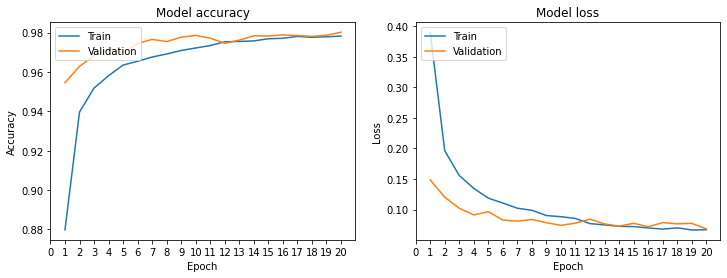

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

nb_epochs = len(history.history['sparse_categorical_accuracy'])
# Plot training & validation accuracy values
#plt.subplot(1, 2, 1)
ax[0].plot(np.arange(1, nb_epochs + 1), history.history['sparse_categorical_accuracy'])
ax[0].plot(np.arange(1, nb_epochs + 1), history.history['val_sparse_categorical_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_xticks(np.arange(0, nb_epochs + 1, 1))
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
#plt.subplot(1, 2, 2)
ax[1].plot(np.arange(1, nb_epochs + 1), history.history['loss'])
ax[1].plot(np.arange(1, nb_epochs + 1), history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks(np.arange(0, nb_epochs + 1, 1))
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

Below 12 epochs, the model underfits, but it does not overfit beyond 12 epochs. Moreover, the accuracy increases and the loss decreases as the number of epochs increases.

To finish, let's try other hyperparameters:
* We use Adagrad optimizer, that adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattening the input
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(256, activation='relu'), # first hidden layer with ReLu function
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'), # second hidden layer
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation='softmax') # Output layer with Softmax function                         # Can add ", activation ='softmax'
])
model3.compile(
    optimizer=tf.keras.optimizers.Adagrad(0.001), # Optimizer choice
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function: Sparse Categorical Cross-entropy                       # If softmax added above, remove from_logits=True
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics: Sparse Categorical Accuracy
)

history = model3.fit(
    X_train/255, y_train, # Normalize the data into [0, 1] !
    batch_size=32,
    epochs=40,
    verbose=0,
    validation_split=0.2
)

model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dropout_20 (Dropout)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               200960    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 10)              

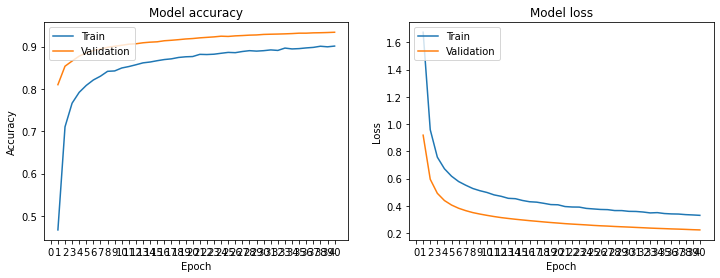

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

nb_epochs = len(history.history['sparse_categorical_accuracy'])
# Plot training & validation accuracy values
#plt.subplot(1, 2, 1)
ax[0].plot(np.arange(1, nb_epochs + 1), history.history['sparse_categorical_accuracy'])
ax[0].plot(np.arange(1, nb_epochs + 1), history.history['val_sparse_categorical_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_xticks(np.arange(0, nb_epochs + 1, 1))
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
#plt.subplot(1, 2, 2)
ax[1].plot(np.arange(1, nb_epochs + 1), history.history['loss'])
ax[1].plot(np.arange(1, nb_epochs + 1), history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks(np.arange(0, nb_epochs + 1, 1))
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

---
### 3.2.2. Convolutional Neural Network (CNN)

The input tensor for the CNN model has a different size compared to the MLP model because CNNs expect image data in the form of multi-dimensional arrays (height, width, and depth), while MLPs expect vector data (a 1D array of features). In this example, the input tensor is of shape (28, 28, 1), representing 28x28 grayscale images.

In [11]:
input_shape = (28, 28, 1)

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test / 255.0

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']
              )

history = model.fit(
                    X_train, y_train, 
                    batch_size=32, 
                    epochs=10,
                    validation_split=0.2
                    )

model.summary()

Epoch 1/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2085 - categorical_accuracy: 0.9352 - val_loss: 0.0673 - val_categorical_accuracy: 0.9803
Epoch 2/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0769 - categorical_accuracy: 0.9759 - val_loss: 0.0482 - val_categorical_accuracy: 0.9862
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0587 - categorical_accuracy: 0.9812 - val_loss: 0.0412 - val_categorical_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0510 - categorical_accuracy: 0.9837 - val_loss: 0.0443 - val_categorical_accuracy: 0.9881
Epoch 5/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0416 - categorical_accuracy: 0.9868 - val_loss: 0.0356 - val_categorical_accuracy: 0.9897
Epoch 6/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0373 - categorical_accuracy: 0.9875 - val_loss: 0.0329 - val_categoric

**Comment the training results. Is it better than your MLP? Faster? Lighter?**

At first, sight, the accuracy is higher and the loss is lower than the MLP models.

However, the training is much slower than the MLP with the same hyperparameters:  $\approx 46$ seconds per epoch for this CNN against $\approx 6$ seconds for the 2-hidden-layer MLP.

To evaluate the model, we plot the loss and accuracy curves against the number of epochs.

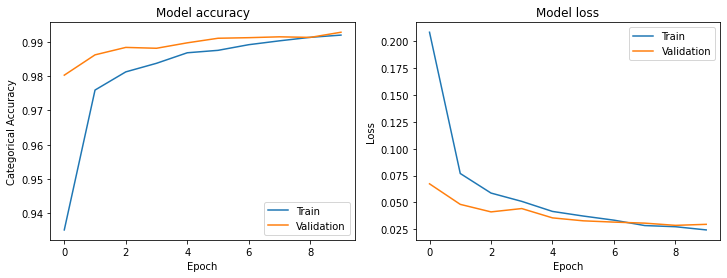

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()


The accuracy increases with each epoch and the loss decreases as the epochs go by. 8 to 10 epochs seems to be the best trade-off regarding training time and accuracy/loss. However, the loss of the validation set seems to slightly increase towards the end while the loss of the training set keep decreasing. Running the model for more epochs might cause our model to be susceptible to overfitting.

Predict Results

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0247 - categorical_accuracy: 0.9917


Our model runs extremely well, with a categorical accuracy of 99.17% on the test dataset and a loss equal to 2.47%.

Confusion Matrix

In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 3s 9ms/step


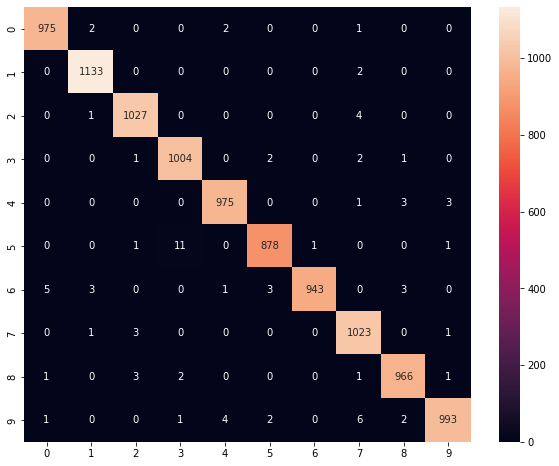

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

There seems to be a slightly higher confusion between (3,5) and (0,6). This is reasonable as 0's and 6's look similar with their loops and 3's and 5's differ from one line.

Let's make the CNN model overfit. We can try increasing the number of epochs (but the training time would increase), reducing the size of the validation set, reducing the dropout rate, adding more dense layers, increasing the number of neurons in the dense layers, or using a less aggressive optimizer like SGD with a higher learning rate.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']
              )

history = model.fit(
                    X_train, y_train, 
                    batch_size=10,
                    epochs=15,
                    validation_split=0.05
                    )

model.summary()

Epoch 1/15
4988/4988 [==============================] - 75s 15ms/step - loss: 0.3739 - categorical_accuracy: 0.8823 - val_loss: 0.0915 - val_categorical_accuracy: 0.9722
Epoch 2/15
4988/4988 [==============================] - 78s 16ms/step - loss: 0.0917 - categorical_accuracy: 0.9715 - val_loss: 0.0698 - val_categorical_accuracy: 0.9794
Epoch 3/15
4988/4988 [==============================] - 69s 14ms/step - loss: 0.0662 - categorical_accuracy: 0.9792 - val_loss: 0.0493 - val_categorical_accuracy: 0.9851
Epoch 4/15
4988/4988 [==============================] - 74s 15ms/step - loss: 0.0515 - categorical_accuracy: 0.9839 - val_loss: 0.0457 - val_categorical_accuracy: 0.9867
Epoch 5/15
4988/4988 [==============================] - 77s 15ms/step - loss: 0.0438 - categorical_accuracy: 0.9864 - val_loss: 0.0459 - val_categorical_accuracy: 0.9844
Epoch 6/15
4988/4988 [==============================] - 89s 18ms/step - loss: 0.0368 - categorical_accuracy: 0.9889 - val_loss: 0.0384 - val_categoric

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

547/547 [==============================] - 6s 11ms/step - loss: 0.0350 - categorical_accuracy: 0.9893


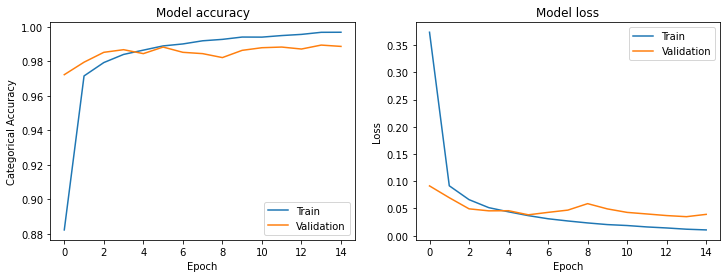

In [16]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

We can see that the model starts overfitting as from 6 epochs, because the accuracy and the loss on the validation set are not as good as on the training set (a gap is formed). Indeed, we removed the dropout, we reduced the size of the validation set, we decreased the batch size, we added dense layers and we changed the optimizer with SGD.